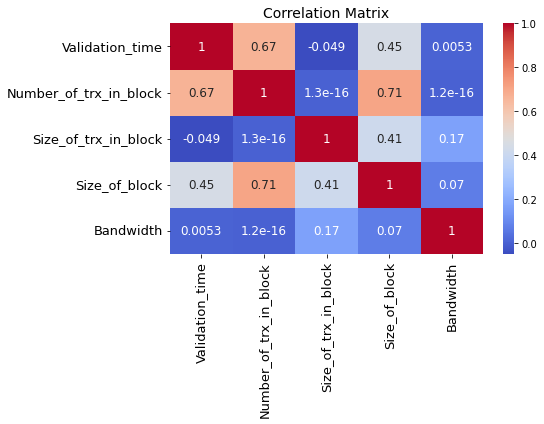

Correlation with 'Validation_time':
Validation_time           1.000000
Number_of_trx_in_block    0.666469
Size_of_block             0.445193
Bandwidth                 0.005285
Size_of_trx_in_block     -0.049342
Name: Validation_time, dtype: float64

Feature Importances:
                  Feature  Importance
0  Number_of_trx_in_block    0.902347
3               Bandwidth    0.052246
2           Size_of_block    0.033494
1    Size_of_trx_in_block    0.011913

Top 2 Features:
['Number_of_trx_in_block', 'Bandwidth']


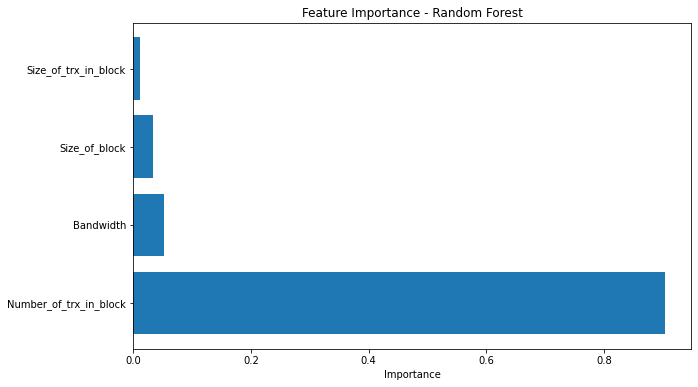

In [13]:
#feature importance for validation org1-peer0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Data
data = {# This is validation time per block
    "Validation_time": [
        0.00138,0.00203,0.00224,0.00273,0.00299,0.00466,0.00412,0.00424,0.00419,0.00083,0.00158,0.00176,0.0021,
    0.00261,0.00498,0.00412,0.00407,0.004002,0.000785,0.00147,0.00179,0.00209,0.00225,0.004147,0.00463,0.00472,
    0.00671,0.00083,0.00221,0.0026,0.00362,0.00304,0.005224,0.0046,0.00513,0.00548,0.00129,0.00151,0.00156,
    0.00198,0.002143,0.0038,0.0053,0.0047,0.00468,0.00113,0.00201,0.00245,0.002623,0.00292,0.00439,0.003114,
    0.0047,0.00469,0.000925,0.00137,0.0021,0.00234,0.00288,0.0053,0.00483,0.005276,0.0045,0.00126,0.001485,
    0.00185,0.00206,0.00248,0.0048,0.00484,0.004897,0.0045,0.000787,0.00124,0.00167,0.00187,0.00211,0.00427,
    0.00697,0.0046,0.00516,0.00102,0.00157,0.0022,0.001796,0.00232,0.00424,0.0048,0.00391,0.0039,0.000936,
    0.001493,0.00159,0.0021,0.00197,0.0043,0.00527,0.00503,0.003694,0.0009,0.0012,0.00168,0.0023,0.00264,
    0.003724,0.00458,0.0051,0.00555
    ],
    "Number_of_trx_in_block": [
   1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100,
    1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100,
    1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100,
    1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100,1, 2, 3, 4, 5, 10, 30, 50, 100,
    ],
     "Size_of_trx_in_block": [
    145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,
    145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,1450,1450,1450,1450,1450,
    1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,
    1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,
    2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450
     ],
     "Bandwidth": [
     400,400,400,400,400,400,400,400,400,800,800,800,800,800,800,800,800,800,1000,1000,1000,1000,1000,
    1000,1000,1000,1000,1200,1200,1200,1200,1200,1200,1200,1200,1200,1600,1600,1600,1600,1600,1600,1600,
    1600,1600,400,400,400,400,400,400,400,400,400,800,800,800,800,800,800,800,800,800,1200,1200,1200,1200,
    1200,1200,1200,1200,1200,1600,1600,1600,1600,1600,1600,1600,1600,1600,800,800,800,800,800,800,800,800,
    800,1200,1200,1200,1200,1200,1200,1200,1200,1200,1600,1600,1600,1600,1600,1600,1600,1600,1600    
     ]
}
df = pd.DataFrame(data)


# Create new feature 'Size_of_block'
df['Size_of_block'] = df['Number_of_trx_in_block'] * df['Size_of_trx_in_block']

# Calculate correlation matrix
 
correlation_matrix = df[['Validation_time', 'Number_of_trx_in_block', 'Size_of_trx_in_block', 'Size_of_block', 'Bandwidth']].corr()
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 12})  

# Add title and adjust font sizes
plt.title("Correlation Matrix", fontsize=14)  # Make the title bigger
plt.xticks(fontsize=13)  # X-axis labels
plt.yticks(fontsize=13)  # Y-axis labels

# Save the heatmap as a high-quality PDF
plt.tight_layout() 
plt.savefig('validation_correlation_matrix.pdf', format='pdf', dpi=600)  # Save as PDF with 300 DPI

# Show the plot
plt.show()

# Optionally print the correlation values
correlation_matrix = df.corr()
print("Correlation with 'Validation_time':")
print(correlation_matrix['Validation_time'].sort_values(ascending=False))

# Train a Random Forest model to find feature importances
X = df[['Number_of_trx_in_block', 'Size_of_trx_in_block', 'Size_of_block', 'Bandwidth']]
y = df['Validation_time']

# Fit Random Forest model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

# Feature importances
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importance_df)

# Choose the two most important features based on correlation and importance
top_features = importance_df.sort_values(by='Importance', ascending=False).head(2)['Feature'].tolist()
print("\nTop 2 Features:")
print(top_features)

# Prepare polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[top_features])

# Visualizing feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()

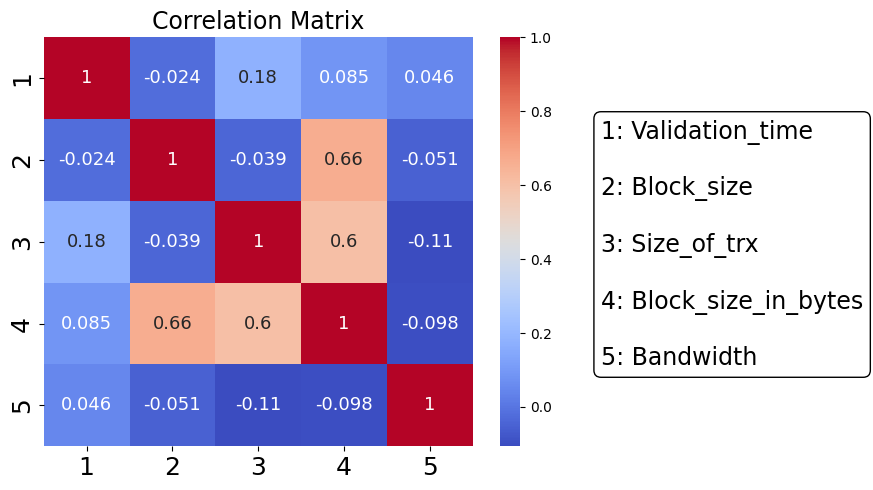

In [15]:
#feature importance for validation org1-peer0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Data
data = {# This is validation time per block
    "Validation_time": [
        0.00138,0.00203,0.00224,0.00273,0.00299,0.00466,0.00412,0.00424,0.00419,0.00083,0.00158,0.00176,0.0021,
    0.00261,0.00498,0.00412,0.00407,0.004002,0.000785,0.00147,0.00179,0.00209,0.00225,0.004147,0.00463,0.00472,
    0.00671,0.00083,0.00221,0.0026,0.00362,0.00304,0.005224,0.0046,0.00513,0.00548,0.00129,0.00151,0.00156,
    0.00198,0.002143,0.0038,0.0053,0.0047,0.00468,0.00113,0.00201,0.00245,0.002623,0.00292,0.00439,0.003114,
    0.0047,0.00469,0.000925,0.00137,0.0021,0.00234,0.00288,0.0053,0.00483,0.005276,0.0045,0.00126,0.001485,
    0.00185,0.00206,0.00248,0.0048,0.00484,0.004897,0.0045,0.000787,0.00124,0.00167,0.00187,0.00211,0.00427,
    0.00697,0.0046,0.00516,0.00102,0.00157,0.0022,0.001796,0.00232,0.00424,0.0048,0.00391,0.0039,0.000936,
    0.001493,0.00159,0.0021,0.00197,0.0043,0.00527,0.00503,0.003694,0.0009,0.0012,0.00168,0.0023,0.00264,
    0.003724,0.00458,0.0051,0.00555
    ],
    "Block_size": [
   1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100,
    1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100,
    1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100,
    1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100,1, 2, 3, 4, 5, 10, 30, 50, 100,
    ],
     "Size_of_trx": [
    145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,
    145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,1450,1450,1450,1450,1450,
    1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,
    1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,
    2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450
     ],
     "Bandwidth": [
     400,400,400,400,400,400,400,400,400,800,800,800,800,800,800,800,800,800,1000,1000,1000,1000,1000,
    1000,1000,1000,1000,1200,1200,1200,1200,1200,1200,1200,1200,1200,1600,1600,1600,1600,1600,1600,1600,
    1600,1600,400,400,400,400,400,400,400,400,400,800,800,800,800,800,800,800,800,800,1200,1200,1200,1200,
    1200,1200,1200,1200,1200,1600,1600,1600,1600,1600,1600,1600,1600,1600,800,800,800,800,800,800,800,800,
    800,1200,1200,1200,1200,1200,1200,1200,1200,1200,1600,1600,1600,1600,1600,1600,1600,1600,1600    
     ]
}


np.random.seed(42)
df = pd.DataFrame({
    'Validation_time': np.random.rand(100),
    'Block_size': np.random.randint(1, 20, 100),
    'Size_of_trx': np.random.randint(10, 500, 100),
    'Bandwidth': np.random.randint(1, 100, 100)
})

# Creating 'Size_of_block'
df['Block_size_in_bytes'] = df['Block_size'] * df['Size_of_trx']

# Calculate correlation matrix
correlation_matrix = df[['Validation_time', 'Block_size', 'Size_of_trx', 'Block_size_in_bytes', 'Bandwidth']].corr()

# Assigning numbers to variable names for a shorter legend
variable_mapping = {
    1: 'Validation_time',
    2: 'Block_size',
    3: 'Size_of_trx',
    4: 'Block_size_in_bytes',
    5: 'Bandwidth'
}

# Replace variable names with their corresponding numbers
correlation_matrix.index = [str(i) for i in variable_mapping.keys()]
correlation_matrix.columns = [str(i) for i in variable_mapping.keys()]

plt.figure(figsize=(6,5))  # Increase figure size to accommodate the legend box
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 13})

# Add title and adjust font sizes
plt.title("Correlation Matrix", fontsize=17)  # Make the title bigger
plt.xticks(fontsize=18)  # X-axis labels
plt.yticks(fontsize=18)  # Y-axis labels

# Add a legend box to indicate variable numbers, positioned inside the plot with a border
legend_labels = [f"{num}: {name}" for num, name in variable_mapping.items()]
legend_text = "\n\n".join(legend_labels) 

# Position the legend box within the figure bounds to ensure it is saved correctly
props = dict(boxstyle='round', facecolor='white', edgecolor='black')
plt.gcf().text(1.01, 0.5, legend_text, fontsize=17, verticalalignment='center', bbox=props)

# Save the heatmap as a high-quality PDF with all content visible
plt.tight_layout()
plt.savefig('validation_correlation_matrix_with_legend.pdf', format='pdf', dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

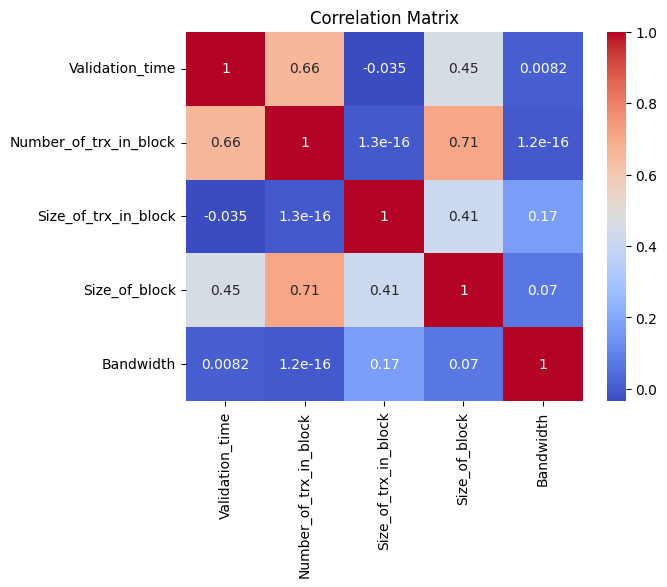

Correlation with 'Validation_time':
Validation_time           1.000000
Number_of_trx_in_block    0.658805
Size_of_block             0.454867
Bandwidth                 0.008176
Size_of_trx_in_block     -0.034737
Name: Validation_time, dtype: float64

Feature Importances:
                  Feature  Importance
0  Number_of_trx_in_block    0.903590
3               Bandwidth    0.050772
2           Size_of_block    0.035230
1    Size_of_trx_in_block    0.010408

Top 2 Features:
['Number_of_trx_in_block', 'Bandwidth']


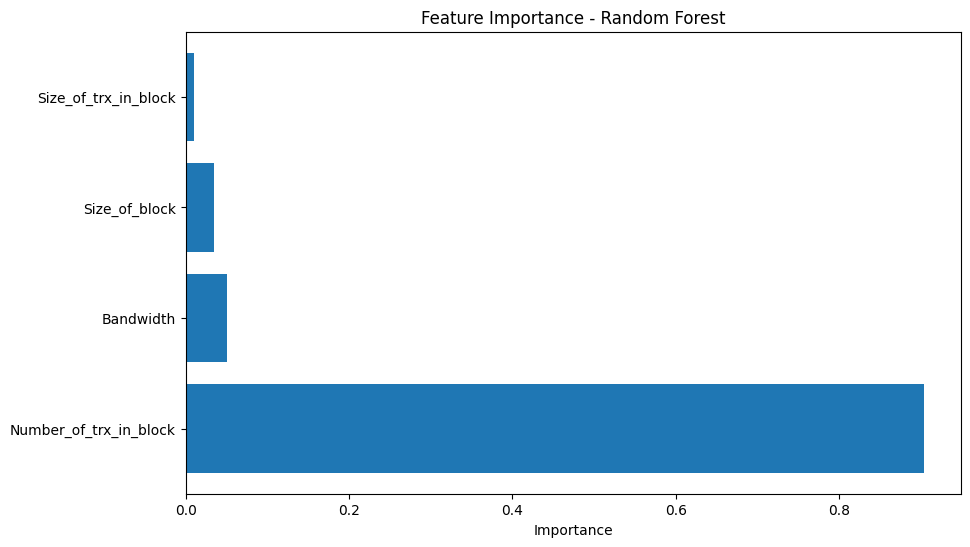

In [3]:
#feature importance for validation org2.peer0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Data
data = {# This is validation time per block
    "Validation_time": [
        0.00137,0.00204,0.00222,0.00273,0.00297,0.00462,0.00409,0.00416,0.00404,
    0.00083,0.00164,0.00177,0.00207,0.00261,0.00497,0.00411,0.00405,0.00389,0.00079,0.00145,0.00182,0.00209,
    0.002174,0.004244,0.00473,0.004689,0.00639,0.000827,0.00224,0.0027,0.00355,0.00286,0.00506,0.0046,0.00506,
    0.00534,0.00127,0.00153,0.00159,0.00187,0.002026,0.0038,0.0053,0.0045,0.0044,0.00114,0.002006,0.00248,0.002613,
    0.0029,0.00434,0.003177,0.00459,0.004664,0.000921,0.00136,0.00212,0.00237,0.00286,0.0052,0.00469,0.005187,
    0.0045,0.00125,0.00148,0.0018,0.00204,0.00241,0.0047,0.004706,0.0047668,0.0045,0.000791,0.00125,0.00164,
    0.00185,0.00202,0.0043,0.00709,0.00477,0.00516,0.001048,0.00162,0.00218,0.001845,0.00228,0.00426,0.00475,
    0.00394,0.0038,0.000928,0.001496,0.0016,0.00216,0.00203,0.0043,0.00523,0.00516,0.0038,0.0009,0.00117,
    0.00172,0.002314,0.00268,0.00379,0.00466,0.0052,0.00549 
    ],
    "Number_of_trx_in_block": [
   1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100,
    1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100,
    1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100,
    1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100,1, 2, 3, 4, 5, 10, 30, 50, 100,
    ],
     "Size_of_trx_in_block": [
    145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,
    145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,1450,1450,1450,1450,1450,
    1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,
    1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,
    2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450
     ],
     "Bandwidth": [
     400,400,400,400,400,400,400,400,400,800,800,800,800,800,800,800,800,800,1000,1000,1000,1000,1000,
    1000,1000,1000,1000,1200,1200,1200,1200,1200,1200,1200,1200,1200,1600,1600,1600,1600,1600,1600,1600,
    1600,1600,400,400,400,400,400,400,400,400,400,800,800,800,800,800,800,800,800,800,1200,1200,1200,1200,
    1200,1200,1200,1200,1200,1600,1600,1600,1600,1600,1600,1600,1600,1600,800,800,800,800,800,800,800,800,
    800,1200,1200,1200,1200,1200,1200,1200,1200,1200,1600,1600,1600,1600,1600,1600,1600,1600,1600    
     ]
}
df = pd.DataFrame(data)


# Create new feature 'Size_of_block'
df['Size_of_block'] = df['Number_of_trx_in_block'] * df['Size_of_trx_in_block']

# Calculate correlation matrix

correlation_matrix = df[['Validation_time', 'Number_of_trx_in_block', 'Size_of_trx_in_block', 'Size_of_block', 'Bandwidth']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

plt.show()
correlation_matrix = df.corr()
print("Correlation with 'Validation_time':")
print(correlation_matrix['Validation_time'].sort_values(ascending=False))

# Train a Random Forest model to find feature importances

X = df[['Number_of_trx_in_block', 'Size_of_trx_in_block', 'Size_of_block', 'Bandwidth']]
y = df['Validation_time']

# Fit Random Forest model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

# Feature importances
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importance_df)

# Choose the two most important features based on correlation and importance
top_features = importance_df.sort_values(by='Importance', ascending=False).head(2)['Feature'].tolist()
print("\nTop 2 Features:")
print(top_features)

# Prepare polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[top_features])

# Visualizing feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()

Linear Regression:
Mean Squared Error: 1.3987728635433009e-06
R-squared: 0.39554029612594344
Mean Absolute Percentage Error: 51.89024563476114%

Decision Tree Regression:
Mean Squared Error: 4.476763636363637e-07
R-squared: 0.806543056955241
Mean Absolute Percentage Error: 15.483511903888433%

Random Forest Regression:
Mean Squared Error: 2.0673337470909097e-07
R-squared: 0.9106631264342704
Mean Absolute Percentage Error: 12.250187356219538%

XGBoost Regression:
Mean Squared Error: 1.8806069206265384e-07
R-squared: 0.9187322593987234
Mean Absolute Percentage Error: 14.020445492071559%

Polynomial Regression with Degree 2:
Mean Squared Error: 7.175609062605971e-07
R-squared: 0.6972393194912396
Mean Absolute Percentage Error: 27.021481914938473%

Derived Equation: Validation_time_P0 = (-8.964958982909937e-07 * Number_of_trx_in_block^2) + (1.3056216465917342e-08 * Number_of_trx_in_block * Bandwidth) + (-7.900233876572831e-11 * Bandwidth^2) + (0.0001041470024393414 * Number_of_trx_in_block

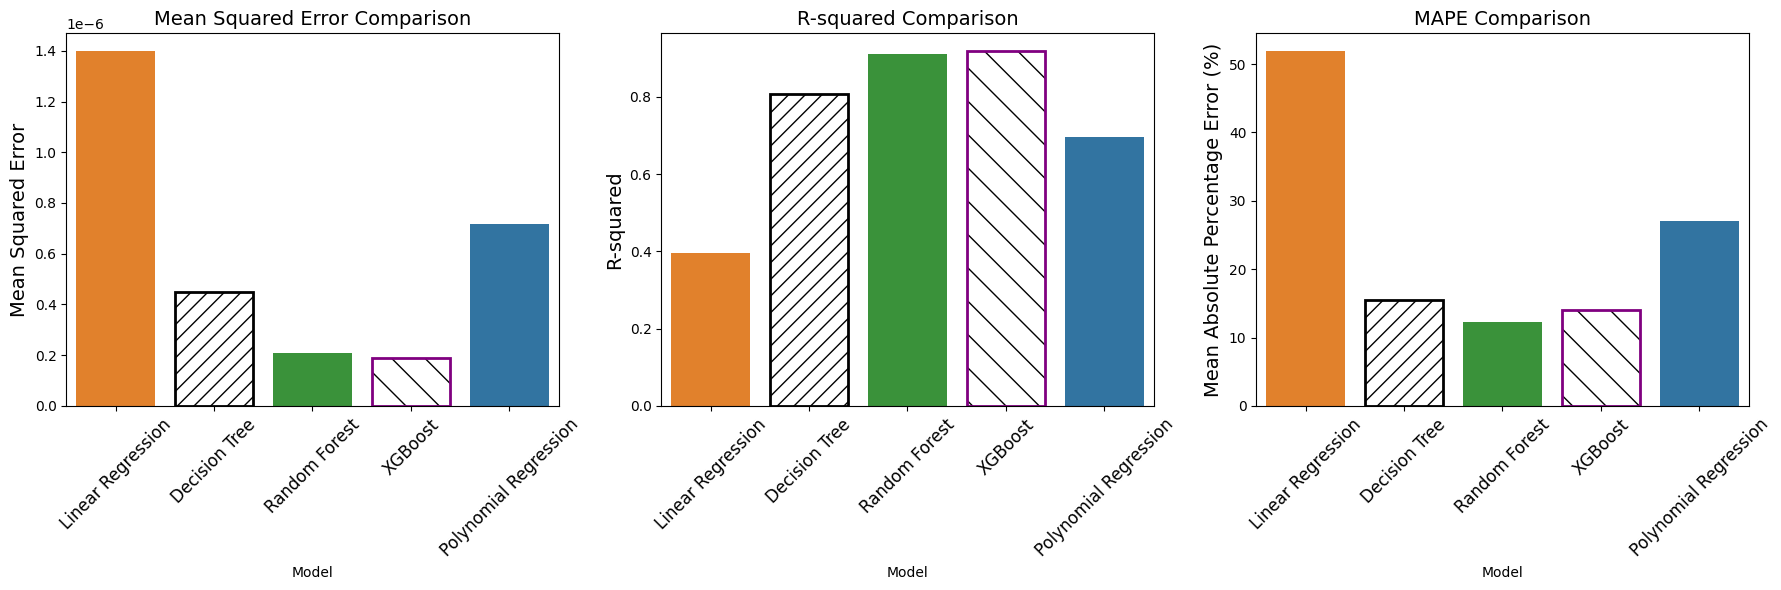

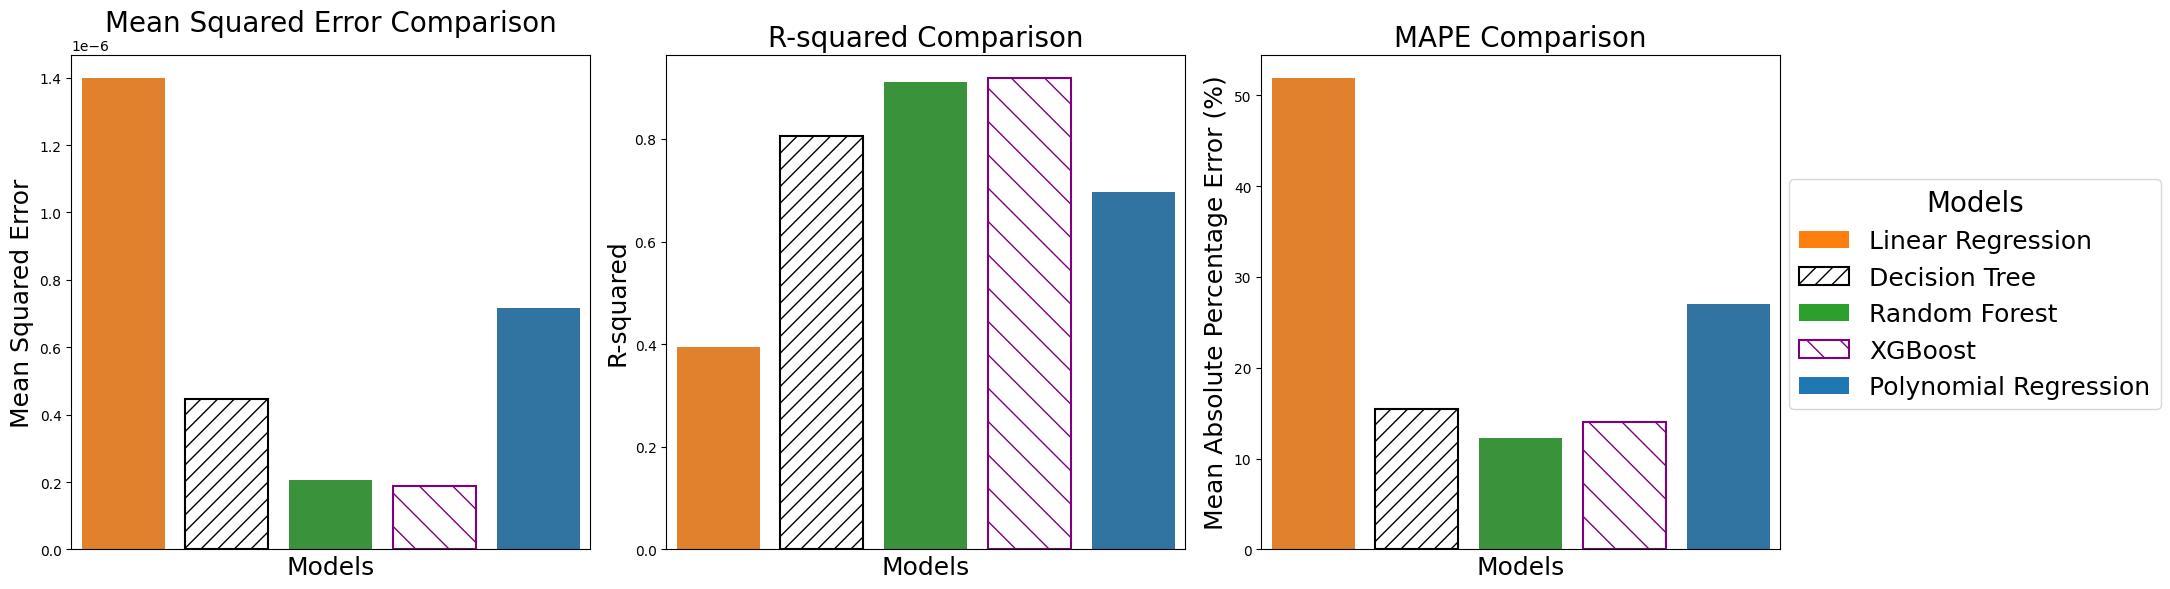

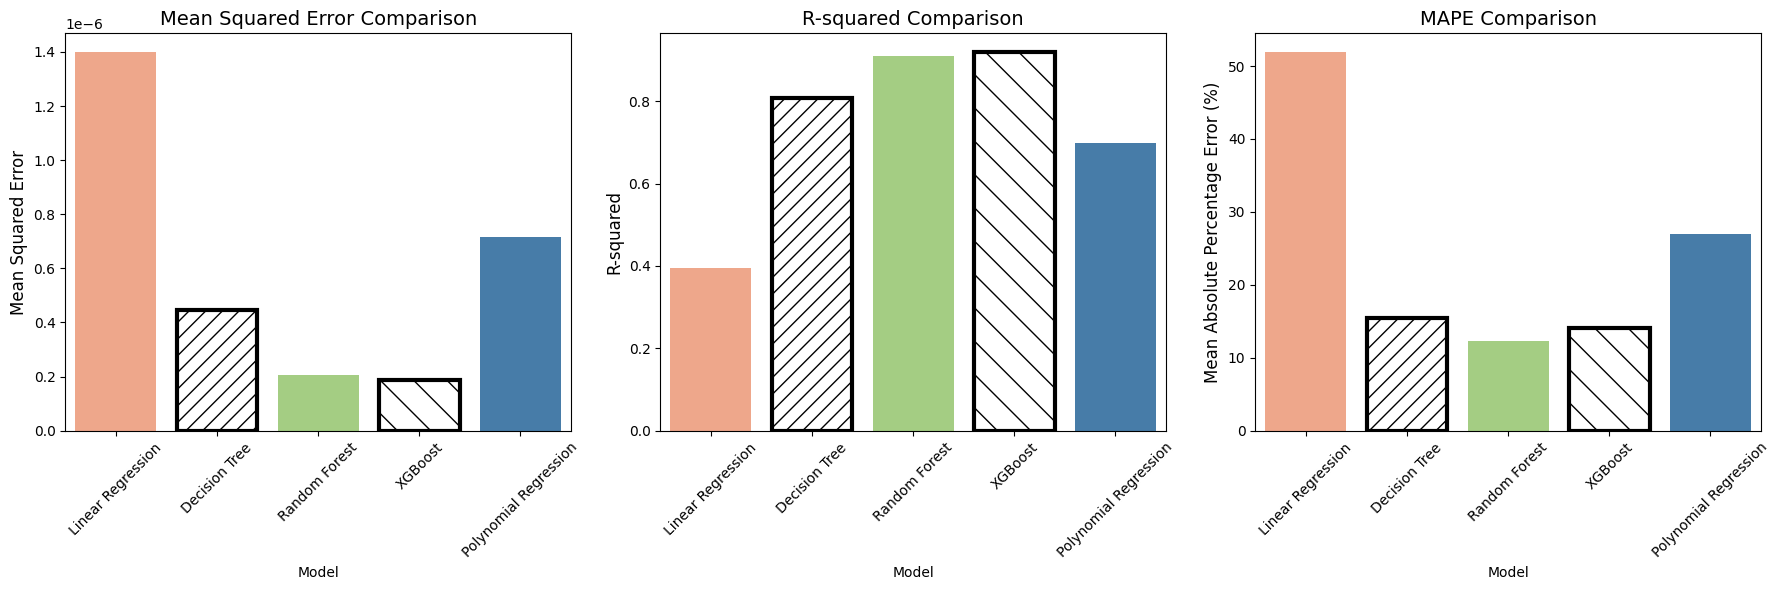

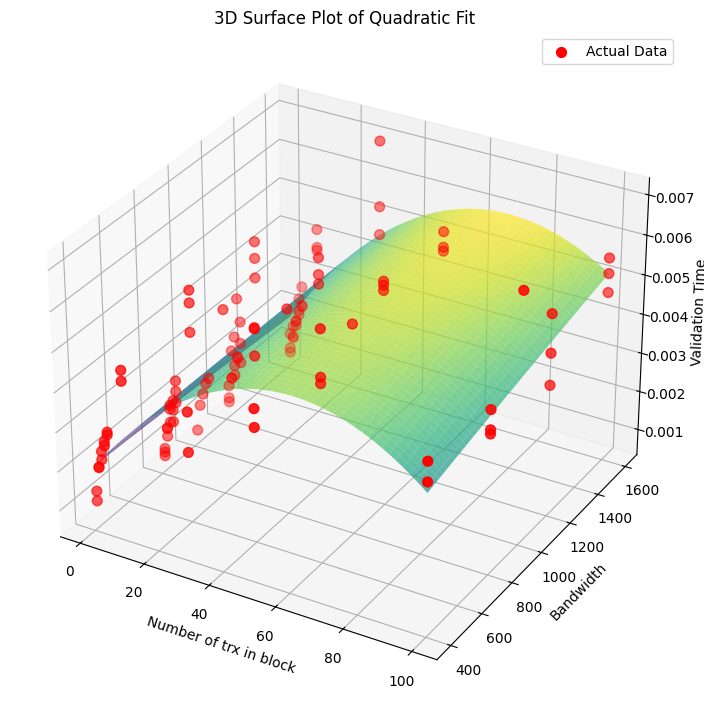

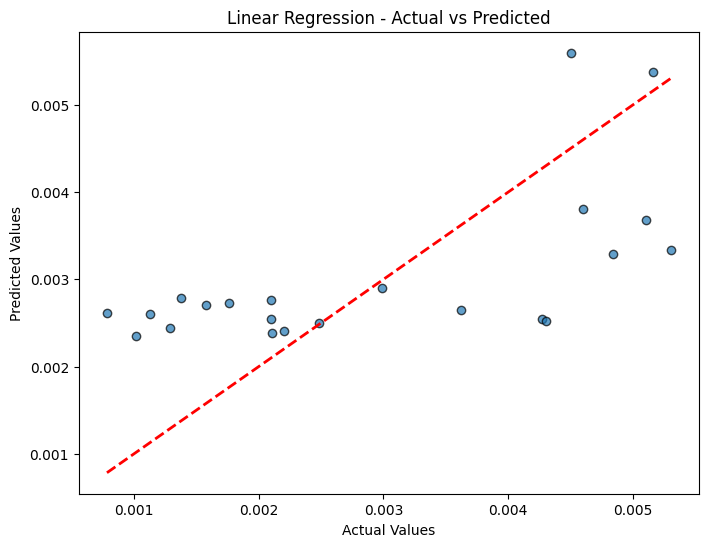

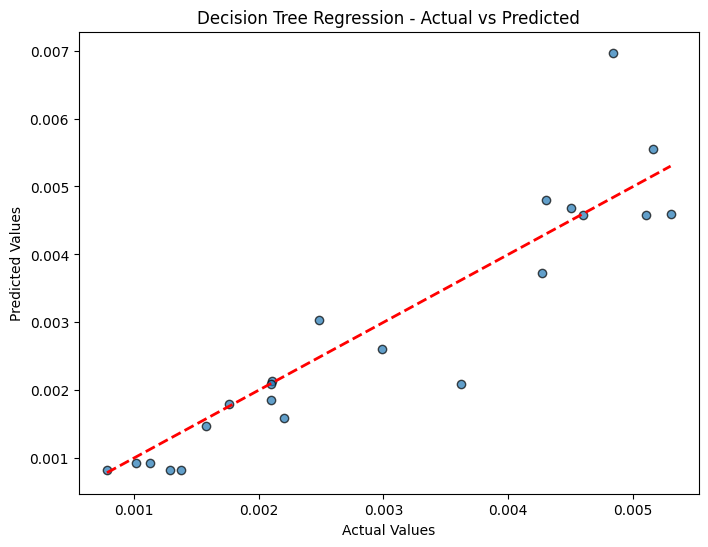

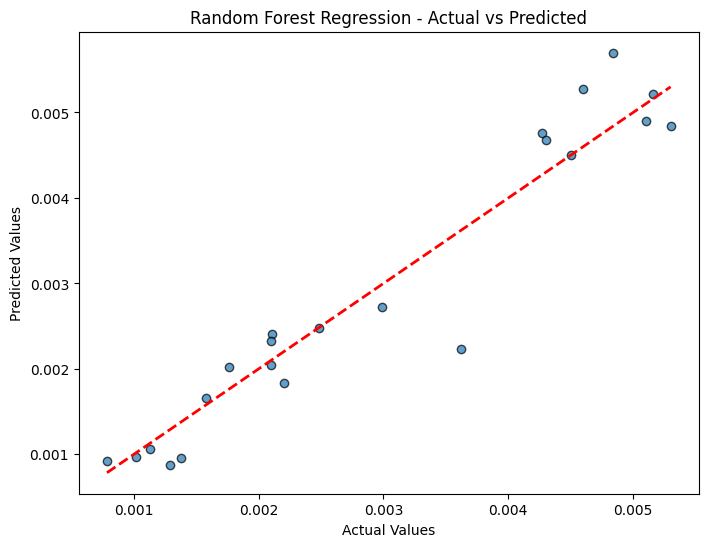

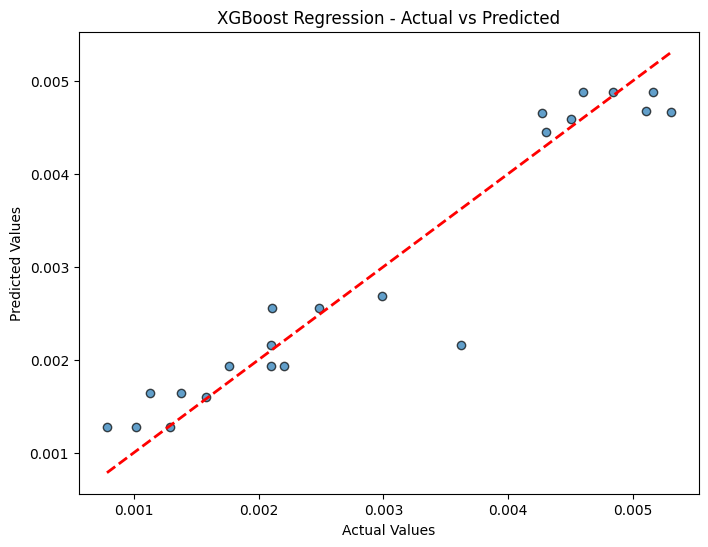

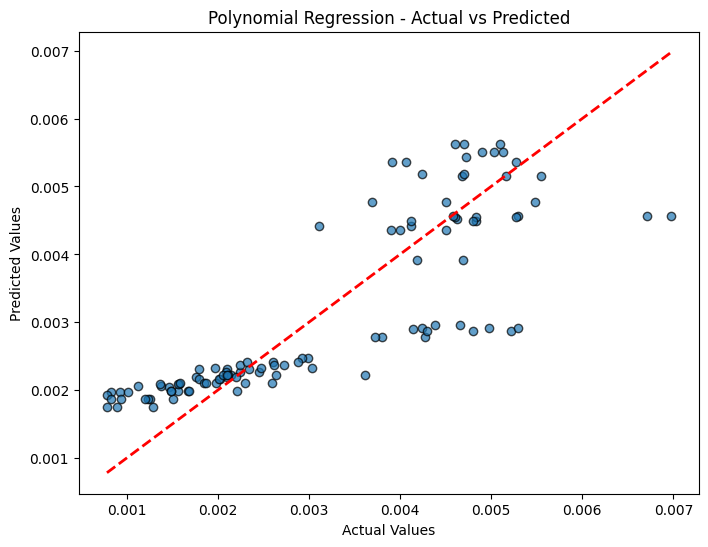

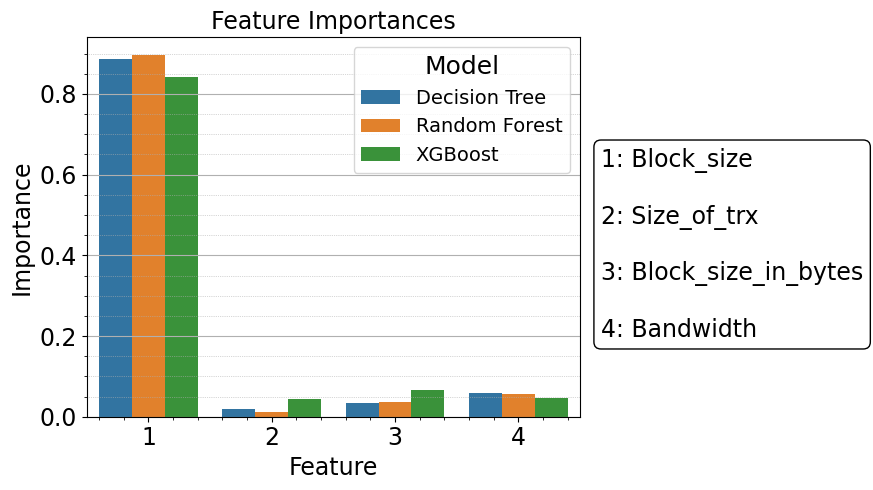

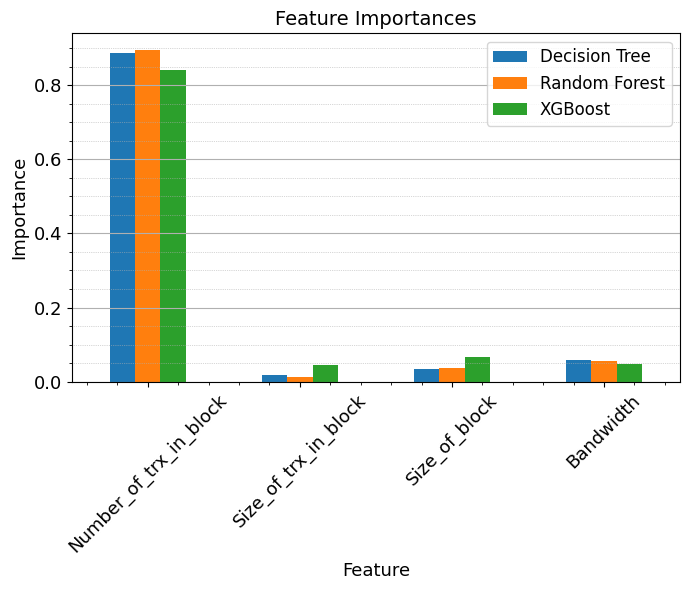

['VP0_scaler_P0.pkl']

In [16]:
## all model for org1.peer0
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from scipy.optimize import curve_fit
import xgboost as xgb  # Import XGBoost
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_elements = y_true != 0
    return np.mean(np.abs((y_true[non_zero_elements] - y_pred[non_zero_elements]) / y_true[non_zero_elements])) * 100


def plot_actual_vs_predicted(y_true, y_pred, model_name):
    """Plot Actual vs Predicted values for a given model."""
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.7, edgecolors='k')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.show()

#Data
data = {# This is validation time per block
    "Validation_time": [
        0.00138,0.00203,0.00224,0.00273,0.00299,0.00466,0.00412,0.00424,0.00419,0.00083,0.00158,0.00176,0.0021,
    0.00261,0.00498,0.00412,0.00407,0.004002,0.000785,0.00147,0.00179,0.00209,0.00225,0.004147,0.00463,0.00472,
    0.00671,0.00083,0.00221,0.0026,0.00362,0.00304,0.005224,0.0046,0.00513,0.00548,0.00129,0.00151,0.00156,
    0.00198,0.002143,0.0038,0.0053,0.0047,0.00468,0.00113,0.00201,0.00245,0.002623,0.00292,0.00439,0.003114,
    0.0047,0.00469,0.000925,0.00137,0.0021,0.00234,0.00288,0.0053,0.00483,0.005276,0.0045,0.00126,0.001485,
    0.00185,0.00206,0.00248,0.0048,0.00484,0.004897,0.0045,0.000787,0.00124,0.00167,0.00187,0.00211,0.00427,
    0.00697,0.0046,0.00516,0.00102,0.00157,0.0022,0.001796,0.00232,0.00424,0.0048,0.00391,0.0039,0.000936,
    0.001493,0.00159,0.0021,0.00197,0.0043,0.00527,0.00503,0.003694,0.0009,0.0012,0.00168,0.0023,0.00264,
    0.003724,0.00458,0.0051,0.00555
    ],
    "Number_of_trx_in_block": [
   1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100,
    1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100,
    1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100,
    1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100,1, 2, 3, 4, 5, 10, 30, 50, 100,
    ],
     "Size_of_trx_in_block": [
    145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,
    145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,1450,1450,1450,1450,1450,
    1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,
    1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,
    2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450
     ],
     "Bandwidth": [
     400,400,400,400,400,400,400,400,400,800,800,800,800,800,800,800,800,800,1000,1000,1000,1000,1000,
    1000,1000,1000,1000,1200,1200,1200,1200,1200,1200,1200,1200,1200,1600,1600,1600,1600,1600,1600,1600,
    1600,1600,400,400,400,400,400,400,400,400,400,800,800,800,800,800,800,800,800,800,1200,1200,1200,1200,
    1200,1200,1200,1200,1200,1600,1600,1600,1600,1600,1600,1600,1600,1600,800,800,800,800,800,800,800,800,
    800,1200,1200,1200,1200,1200,1200,1200,1200,1200,1600,1600,1600,1600,1600,1600,1600,1600,1600    
     ]
}
df = pd.DataFrame(data)

# Create a new feature 'Size_of_block'
df['Size_of_block'] = df['Number_of_trx_in_block'] * df['Size_of_trx_in_block']

# Prepare data for regression
X = df[['Number_of_trx_in_block', 'Size_of_trx_in_block', 'Size_of_block', 'Bandwidth']]

y = df['Validation_time']

# Standardize the features
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)

# Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
mape_tree = mean_absolute_percentage_error(y_test, y_pred_tree)

# Random Forest Regression
forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
mape_forest = mean_absolute_percentage_error(y_test, y_pred_forest)

# XGBoost Regression
#XGBoost is an optimized gradient boosting framework designed for speed and performance
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgboost = xgboost_model.predict(X_test)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
r2_xgboost = r2_score(y_test, y_pred_xgboost)
mape_xgboost = mean_absolute_percentage_error(y_test, y_pred_xgboost)

# Define the quadratic function 2
def quadratic_model(X, a, b, c, d, e, f):
    x1, x2 = X
    return a * x1**2 + b * x1 * x2 + c * x2**2 + d * x1 + e * x2 + f
# Prepare data for quadratic model
# Standardize the data
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(df[['Number_of_trx_in_block', 'Bandwidth']]).T
#X_quad = X_scaled
X_quad = df[['Number_of_trx_in_block', 'Bandwidth']].values.T
y_quad = df['Validation_time']
# Fit the model using curve fitting
params,covariance = curve_fit(quadratic_model, X_quad, y_quad)
# Predict using the fitted model
y_pred_quad = quadratic_model(X_quad, *params)
# Extract fitted parameters
a, b, c, d, e, f = params
# Make predictions using the fitted model
predictions = quadratic_model(X_quad, *params)
# Compute performance metrics
mse_quad = mean_squared_error(y_quad, y_pred_quad)
r2_quad = r2_score(y_quad, y_pred_quad)
mape_quad = mean_absolute_percentage_error(y_quad, y_pred_quad)



# Define the quadratic function for 4 features
def quadratic_model_4_features(x1, x2, x3, x4, a, b, c, d, e, f, g, h, i, j, k, l, m, n, o):
    return (a * x1**2 + b * x2**2 + c * x3**2 + d * x4**2 +
            e * x1 * x2 + f * x1 * x3 + g * x1 * x4 +
            h * x2 * x3 + i * x2 * x4 + j * x3 * x4 +
            k * x1 + l * x2 + m * x3 + n * x4 +
            o)
# Define the model function for curve fitting
def model_func(X_flat, *params):
    x1, x2, x3, x4 = X_flat
    return quadratic_model_4_features(x1, x2, x3, x4, *params)
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Number_of_trx_in_block', 'Size_of_trx_in_block', 'Bandwidth', 'Size_of_block']])
# Prepare data for quadratic model with 4 features (transpose to get the right shape)
X_quad_4 = X_scaled.T
y_quad_4 = df['Validation_time'].values
# Fit the model using curve fitting
initial_guess = np.ones(15)
params_4, _ = curve_fit(model_func, X_quad_4, y_quad_4, p0=initial_guess)
# Predict using the fitted model
x1, x2, x3, x4 = X_quad_4  # Unpack features for prediction
y_pred_quad4 = quadratic_model_4_features(x1, x2, x3, x4, *params_4)
# Compute performance metrics
mse_quad4 = mean_squared_error(y_quad_4, y_pred_quad4)
r2_quad4 = r2_score(y_quad_4, y_pred_quad4)
mape_quad4 = mean_absolute_percentage_error(y_quad_4, y_pred_quad4)


# Display results
print("Linear Regression:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")
print(f"Mean Absolute Percentage Error: {mape_linear}%\n")

print("Decision Tree Regression:")
print(f"Mean Squared Error: {mse_tree}")
print(f"R-squared: {r2_tree}")
print(f"Mean Absolute Percentage Error: {mape_tree}%\n")

print("Random Forest Regression:")
print(f"Mean Squared Error: {mse_forest}")
print(f"R-squared: {r2_forest}")
print(f"Mean Absolute Percentage Error: {mape_forest}%\n")

print("XGBoost Regression:")
print(f"Mean Squared Error: {mse_xgboost}")
print(f"R-squared: {r2_xgboost}")
print(f"Mean Absolute Percentage Error: {mape_xgboost}%\n")

equation = f"Validation_time_P0 = ({a} * Number_of_trx_in_block^2) + ({b} * Number_of_trx_in_block * Bandwidth) + ({c} * Bandwidth^2) + ({d} * Number_of_trx_in_block) + ({e} * Bandwidth) + {f}"

print("Polynomial Regression with Degree 2:")
print(f"Mean Squared Error: {mse_quad}")
print(f"R-squared: {r2_quad}")
print(f"Mean Absolute Percentage Error: {mape_quad}%\n")
print(f"Derived Equation: {equation}")

#print("Polynomial Regression with Degree 4:")
#print(f"Mean Squared Error: {mse_quad4}")
#print(f"R-squared: {r2_quad4}")
#print(f"Mean Absolute Percentage Error: {mape_quad4}%\n")



# Sample data (replace with your actual data)
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Polynomial Regression']
mse_scores = [mse_linear, mse_tree, mse_forest, mse_xgboost, mse_quad]
r2_scores = [r2_linear, r2_tree, r2_forest, r2_xgboost, r2_quad]
mape_scores = [mape_linear, mape_tree, mape_forest, mape_xgboost, mape_quad]

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Model': models,
    'MSE': mse_scores,
    'R2': r2_scores,
    'MAPE': mape_scores
})

# Melt the DataFrame for seaborn
plot_data_melted = plot_data.melt(id_vars='Model', value_vars=['MSE', 'R2', 'MAPE'], 
                                  var_name='Metric', value_name='Score')

# Define a consistent color palette for models
#model_colors = {
 #   'Linear Regression': '#FFA07A',  # Light Salmon
  #  'Random Forest': '#A3D977',      # Moccasin
   # 'Polynomial Regression': '#377EB8'  # Blue
#}

model_colors = {
    'Linear Regression': '#ff7f0e',  # Light Salmon
    'Random Forest': '#2ca02c',      # Moccasin
    'Polynomial Regression': '#1f77b4'  # Blue
}

# Plot each metric with custom styles
plt.figure(figsize=(18, 6))

# Plotting function with hatchery patterns
def plot_metric(metric_name, position, title, ylabel):
    plt.subplot(1, 3, position)
    ax = sns.barplot(x='Model', y='Score', data=plot_data_melted.query(f"Metric == '{metric_name}'"),
                     palette=[model_colors.get(model, '#FFFFFF') for model in models], hue='Model', dodge=False, legend=False)

    # Adding hatch to specific bars for Decision Tree and XGBoost
    hatches = [''] * len(models)
    for i, model in enumerate(models):
        if model == 'Decision Tree':
            hatches[i] = '//'  # Hatch for Decision Tree
        elif model == 'XGBoost':
            hatches[i] = '\\'  # Reverse hatch for XGBoost (using same line spacing)
    
    for bar, hatch in zip(ax.patches, hatches):
        bar.set_hatch(hatch)
        if model == 'XGBoost':
            bar.set_facecolor('none')  # No background color for XGBoost
            bar.set_edgecolor('#800080')  # Purple border for XGBoost
            bar.set_linewidth(1)  # Thinner line thickness for border box
            hatch_color = '#800080'  # Set hatch color to purple
            bar.set_hatch(hatch + hatch_color)
        if model == 'Decision Tree':
            bar.set_facecolor('none')
            bar.set_edgecolor('black')  # Add border box for Decision Tree bars
            bar.set_linewidth(1)  # Thinner border for Decision Tree

    # Adding a rectangle around the bar to create a more visible border
    for i, bar in enumerate(ax.patches):
        if models[i] in ['Decision Tree', 'XGBoost']:
            x, y = bar.get_xy()
            width = bar.get_width()
            height = bar.get_height()
            edge_color = '#800080' if models[i] == 'XGBoost' else 'black'
            plt.gca().add_patch(plt.Rectangle((x, y), width, height, fill=False, edgecolor=edge_color, linewidth=2))  # Thinner border

    plt.title(title, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45 ,fontsize=12)

# Plot Mean Squared Error
plot_metric('MSE', 1, 'Mean Squared Error Comparison', 'Mean Squared Error')

# Plot R-squared
plot_metric('R2', 2, 'R-squared Comparison', 'R-squared')

# Plot MAPE
plot_metric('MAPE', 3, 'MAPE Comparison', 'Mean Absolute Percentage Error (%)')

plt.tight_layout()  # Ensures labels and plot are not cut off
plt.savefig('validation_models.pdf', format='pdf', dpi=600)  # Save as PDF with 300 DPI

plt.show()




#injaaaaaaaa




# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Models': models,
    'MSE': mse_scores,
    'R2': r2_scores,
    'MAPE': mape_scores
})

# Melt the DataFrame for seaborn
plot_data_melted = plot_data.melt(id_vars='Models', value_vars=['MSE', 'R2', 'MAPE'], 
                                  var_name='Metric', value_name='Score')

# Define color mapping for models
model_colors = {
    'Linear Regression': '#ff7f0e',  # Light Salmon
    'Decision Tree': 'none',         # No background color for Decision Tree
    'Random Forest': '#2ca02c',      # Green
    'XGBoost': 'none',               # No background color for XGBoost
    'Polynomial Regression': '#1f77b4'  # Blue
}

# Plot each metric with custom styles
plt.figure(figsize=(18, 6))

# Plotting function with updated styles for Decision Tree and XGBoost
def plot_metric(metric_name, position, title, ylabel):
    plt.subplot(1, 3, position)
    ax = sns.barplot(x='Models', y='Score', data=plot_data_melted.query(f"Metric == '{metric_name}'"),
                     palette=[model_colors.get(model, '#FFFFFF') for model in models], hue='Models', dodge=False, legend=False)

    # Adding custom formatting for Decision Tree and XGBoost
    hatches = [''] * len(models)
    for i, model in enumerate(models):
        if model == 'Decision Tree':
            hatches[i] = '//'  # Hatch for Decision Tree
        elif model == 'XGBoost':
            hatches[i] = '\\'  # Reverse hatch for XGBoost

    for bar, hatch, model in zip(ax.patches, hatches, models):
        bar.set_hatch(hatch)
        if model == 'Decision Tree':
            bar.set_facecolor('none')  # No background color for Decision Tree
            bar.set_edgecolor('black')  # Black border for Decision Tree
            bar.set_linewidth(1.5)  # Thicker line for visibility
        elif model == 'XGBoost':
            bar.set_facecolor('none')  # No background color for XGBoost
            bar.set_edgecolor('#800080')  # Purple border for XGBoost
            bar.set_linewidth(1.5)  # Thicker line for visibility

    plt.title(title, fontsize=20)
    plt.ylabel(ylabel, fontsize=18)
    plt.xlabel('Models', fontsize=18)
    plt.xticks([], [])


# Plot Mean Squared Error
plot_metric('MSE', 1, 'Mean Squared Error Comparison', 'Mean Squared Error')

# Plot R-squared
plot_metric('R2', 2, 'R-squared Comparison', 'R-squared')

# Plot MAPE
plot_metric('MAPE', 3, 'MAPE Comparison', 'Mean Absolute Percentage Error (%)')

# Create custom legend elements to reflect the changes in Decision Tree and XGBoost styles
legend_handles = [
    mpatches.Patch(facecolor='#ff7f0e', edgecolor='none', label='Linear Regression'),
    mpatches.Patch(facecolor='none', edgecolor='black', linewidth=1.5, hatch='//', label='Decision Tree'),
    mpatches.Patch(facecolor='#2ca02c', edgecolor='none', label='Random Forest'),
    mpatches.Patch(facecolor='none', edgecolor='#800080', linewidth=1.5, hatch='\\', label='XGBoost'),
    mpatches.Patch(facecolor='#1f77b4', edgecolor='none', label='Polynomial Regression')
]

# Add the legend outside the plot on the left side of the last subplot
plt.gcf().legend(
    handles=legend_handles,
    loc='center',
    bbox_to_anchor=(1.10, 0.5),
    fontsize=18,  # Increased font size for model names
    title='Models',
    title_fontsize=20  # Increased font size for the legend title
)
plt.tight_layout()  # Ensures labels and plot are not cut off
plt.savefig('validation_models_with_hatches_and_legend.pdf', format='pdf', dpi=600, bbox_inches='tight')  # Save as PDF with 300 DPI

plt.show()








# Sample data (replace with your actual data)
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Polynomial Regression']
mse_scores = [mse_linear, mse_tree, mse_forest, mse_xgboost, mse_quad]
r2_scores = [r2_linear, r2_tree, r2_forest, r2_xgboost, r2_quad]
mape_scores = [mape_linear, mape_tree, mape_forest, mape_xgboost, mape_quad]

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Model': models,
    'MSE': mse_scores,
    'R2': r2_scores,
    'MAPE': mape_scores
})

# Melt the DataFrame for seaborn
plot_data_melted = plot_data.melt(id_vars='Model', value_vars=['MSE', 'R2', 'MAPE'], 
                                  var_name='Metric', value_name='Score')

# Define a consistent color palette for models
model_colors = {
    'Linear Regression': '#FFA07A',  # Light Salmon
    'Random Forest': '#A3D977',      # Moccasin
    'Polynomial Regression': '#377EB8'  # Blue
}

# Plot each metric with custom styles
plt.figure(figsize=(18, 6))

# Plotting function with hatchery patterns
def plot_metric(metric_name, position, title, ylabel):
    plt.subplot(1, 3, position)
    ax = sns.barplot(x='Model', y='Score', data=plot_data_melted.query(f"Metric == '{metric_name}'"),
                     palette=[model_colors.get(model, '#FFFFFF') for model in models], hue='Model', dodge=False, legend=False)

    # Adding hatch to specific bars for Decision Tree and XGBoost
    hatches = [''] * len(models)
    for i, model in enumerate(models):
        if model == 'Decision Tree':
            hatches[i] = '//'  # Hatch for Decision Tree
        elif model == 'XGBoost':
            hatches[i] = '\\'  # Reverse hatch for XGBoost (using same line spacing)
    
    for bar, hatch in zip(ax.patches, hatches):
        bar.set_hatch(hatch)
        if model == 'XGBoost':
            bar.set_facecolor('#800080')  # Purple hatch color for XGBoost
        if model in ['Decision Tree', 'XGBoost']:  # No background color for hatched bars
            bar.set_facecolor('none')
            bar.set_edgecolor('black')  # Add border box for hatched bars
            bar.set_linewidth(1)  # Add line thickness for border box

    # Adding a rectangle around the bar to create a more visible border
    for i, bar in enumerate(ax.patches):
        if models[i] in ['Decision Tree', 'XGBoost']:
            x, y = bar.get_xy()
            width = bar.get_width()
            height = bar.get_height()
            plt.gca().add_patch(plt.Rectangle((x, y), width, height, fill=False, edgecolor='black', linewidth=3))

    plt.title(title, fontsize=14)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)

# Plot Mean Squared Error
plot_metric('MSE', 1, 'Mean Squared Error Comparison', 'Mean Squared Error')

# Plot R-squared
plot_metric('R2', 2, 'R-squared Comparison', 'R-squared')

# Plot MAPE
plot_metric('MAPE', 3, 'MAPE Comparison', 'Mean Absolute Percentage Error (%)')

plt.tight_layout()  # Ensures labels and plot are not cut off
plt.savefig('validation_models_with_custom_hatch.pdf', format='pdf', dpi=300)  # Save as PDF with 300 DPI

plt.show()



# 3D Plot for quadratic model with 2 features
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(121, projection='3d')

# Define the range for x1 and x2
x1 = np.linspace(df['Number_of_trx_in_block'].min(), df['Number_of_trx_in_block'].max(), 100)
x2 = np.linspace(df['Bandwidth'].min(), df['Bandwidth'].max(), 100)
X1, X2 = np.meshgrid(x1, x2)
Z = quadratic_model(np.array([X1.ravel(), X2.ravel()]), *params).reshape(X1.shape)

# Plot the surface
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.7, edgecolor='none')
ax.scatter(df['Number_of_trx_in_block'], df['Bandwidth'], df['Validation_time'], c='red', s=50, label='Actual Data')
ax.set_xlabel('Number of trx in block')
ax.set_ylabel('Bandwidth')
ax.set_zlabel('Validation Time')
ax.set_title('3D Surface Plot of Quadratic Fit')
ax.legend()

plt.tight_layout()
plt.show()








# Update actual vs predicted plots
plot_actual_vs_predicted(y_test, y_pred_linear, 'Linear Regression')
plot_actual_vs_predicted(y_test, y_pred_tree, 'Decision Tree Regression')
plot_actual_vs_predicted(y_test, y_pred_forest, 'Random Forest Regression')
plot_actual_vs_predicted(y_test, y_pred_xgboost, 'XGBoost Regression')
plot_actual_vs_predicted(y_quad, y_pred_quad, 'Polynomial Regression')
#plot_actual_vs_predicted(y_quad_4, y_pred_quad4, 'Polynomial Regression 4 Features')

# Feature Importances
importances_linear = np.abs(linear_model.coef_)  # Using absolute value of coefficients
importances_tree = tree_model.feature_importances_
importances_forest = forest_model.feature_importances_
importances_xgboost = xgboost_model.feature_importances_
importances_poly2 = np.abs(np.array([params[0], params[1], params[2], params[3], params[4], params[5]]))  # Absolute values of the coefficients


# Create a DataFrame to hold the feature importances
# Mean Squared Error (MSE) is a metric that measures the average of the squares of the differences between the actual and predicted values.
# R-squared (R²) is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
#Mean Absolute Percentage Error (MAPE) is a metric that measures the average percentage error between the predicted and actual values, providing insight into the accuracy of the model.
features = ['1', '2', '3', '4']


feature_importances = pd.DataFrame({
    'Feature': features,
    'Decision Tree': importances_tree,
    'Random Forest': importances_forest,
    'XGBoost': importances_xgboost
 
})

# Melt the DataFrame for plotting
feature_importances_melted = feature_importances.melt(id_vars='Feature', var_name='Model', value_name='Importance')



plt.figure(figsize=(6, 5))
sns.barplot(data=feature_importances_melted, x='Feature', y='Importance', hue='Model')

# Add labels and title
plt.xlabel('Feature', fontsize=17)
plt.ylabel('Importance', fontsize=17)
plt.title("Feature Importances", fontsize=17)
plt.xticks(fontsize=17, rotation=0, weight='regular')
plt.yticks(fontsize=17)

# Add horizontal gridlines for better readability
plt.grid(axis='y', which='both')
plt.minorticks_on()
plt.grid(which='minor', axis='y', linestyle=':', linewidth='0.5')
plt.legend(title='Model', fontsize=14, title_fontsize=18, loc='upper right')

# Add a legend box outside the plot, similar to the correlation matrix plot
variable_mapping = {
    1: 'Block_size',
    2: 'Size_of_trx',
    3: 'Block_size_in_bytes',
    4: 'Bandwidth'
}

legend_labels = [f"{num}: {name}" for num, name in variable_mapping.items()]
legend_text ="\n\n".join(legend_labels)
# Position the legend box outside the plot with a border
props = dict(boxstyle='round', facecolor='white', edgecolor='black')
plt.gcf().text(1.01, 0.5, legend_text, fontsize=17, verticalalignment='center', bbox=props)

# Save the plot as a high-quality PDF with all content visible
plt.tight_layout()
plt.savefig('validation_feature_importance_with_legend.pdf', format='pdf', dpi=600, bbox_inches='tight')

plt.show()





feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Decision Tree': importances_tree,
    'Random Forest': importances_forest,
    'XGBoost': importances_xgboost
 
})

# Melt the DataFrame for plotting
feature_importances_melted = feature_importances.melt(id_vars='Feature', var_name='Model', value_name='Importance')



feature_importances.plot(x='Feature', kind='bar', figsize=(7, 6))


plt.xlabel('Feature',fontsize=13)
plt.ylabel('Importance',fontsize=13)
plt.title("Feature Importances", fontsize=14)  # Make the title bigger
plt.xticks(fontsize=13)  # X-axis labels
plt.yticks(fontsize=13)
plt.xticks(rotation=45)

# Add horizontal gridlines with more density
plt.grid(axis='y', which='both')  # 'both' ensures major and minor gridlines are shown
plt.legend(fontsize=12)  # Increase the font size of the legend

# Optionally set the minor gridlines for finer lines
plt.minorticks_on()  # Enable minor ticks if not on by default
plt.grid(which='minor', axis='y', linestyle=':', linewidth='0.5')  # Add minor gridlines
plt.tight_layout()  # Ensures labels and plot are not cut off
plt.savefig('validation_feature_importance.pdf', format='pdf', dpi=600)  # Save as PDF with 300 DPI

plt.show()


#Best Performance: Random Forest Regression and XGBoost Regression 

import joblib

# Save the models
joblib.dump(linear_model, 'VP0_linear_model.pkl')
joblib.dump(tree_model, 'VP0_tree_model.pkl')
joblib.dump(forest_model, 'VP0_forest_model.pkl')
joblib.dump(xgboost_model, 'VP0_xgboost_model.pkl')
joblib.dump(params_4, 'VP0_quadratic_model_4_features_params.pkl')
joblib.dump(params, 'VP0_quadratic_model.pkl')
joblib.dump(scaler, 'VP0_scaler_P0.pkl')


In [6]:
pip install xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 22.7 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 20.3 MB/s eta 0:00:00m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


Linear Regression:
Mean Squared Error: 1.4082310927246242e-06
R-squared: 0.3980480304488667
Mean Absolute Percentage Error: 51.67697674490183%

Decision Tree Regression:
Mean Squared Error: 4.5534618181818176e-07
R-squared: 0.8053611141032789
Mean Absolute Percentage Error: 18.22249057393213%

Random Forest Regression:
Mean Squared Error: 2.0523367902400015e-07
R-squared: 0.9122723408501817
Mean Absolute Percentage Error: 12.345376305520613%

XGBoost Regression:
Mean Squared Error: 1.8874626760038784e-07
R-squared: 0.9193199268824155
Mean Absolute Percentage Error: 14.344729084558846%

Polynomial Regression with Degree 2:
Mean Squared Error: 6.952455298488617e-07
R-squared: 0.6992818262470778
Mean Absolute Percentage Error: 26.883780828764394%

Derived Equation: Validation_time_P1 = (-9.056907053304015e-07 * Number_of_trx_in_block^2) + (1.3441580735493351e-08 * Number_of_trx_in_block * Bandwidth) + (-6.272079389907594e-11 * Bandwidth^2) + (0.00010384258259717794 * Number_of_trx_in_bloc

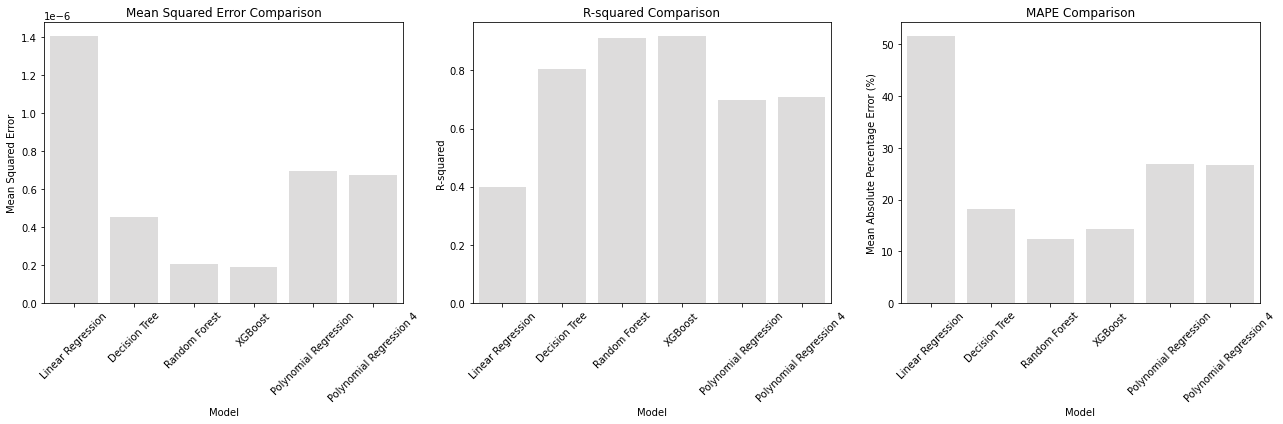

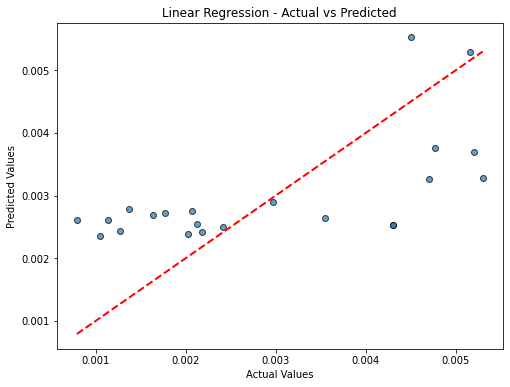

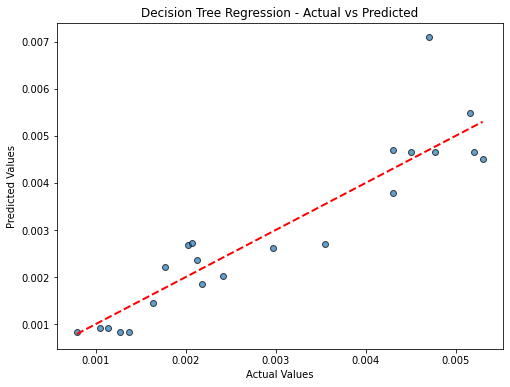

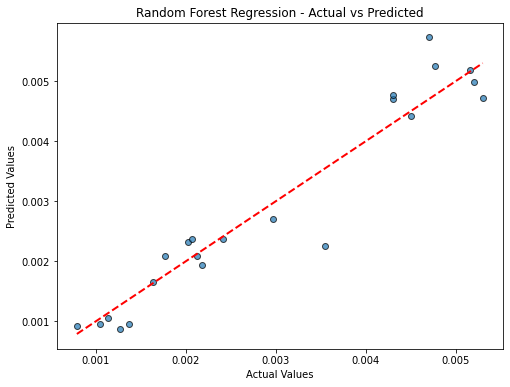

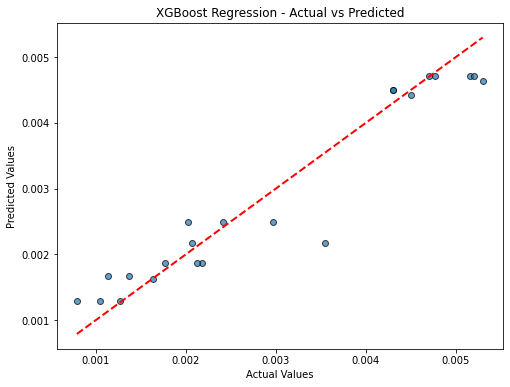

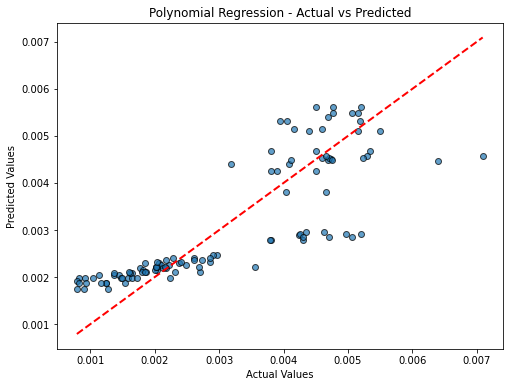

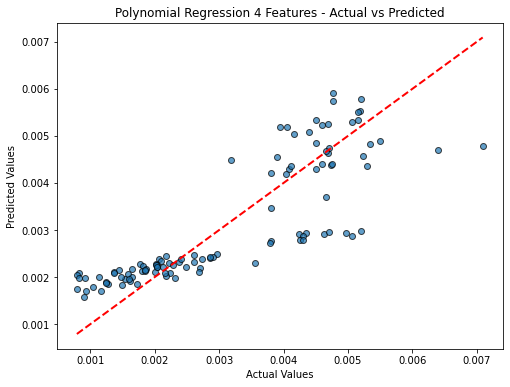

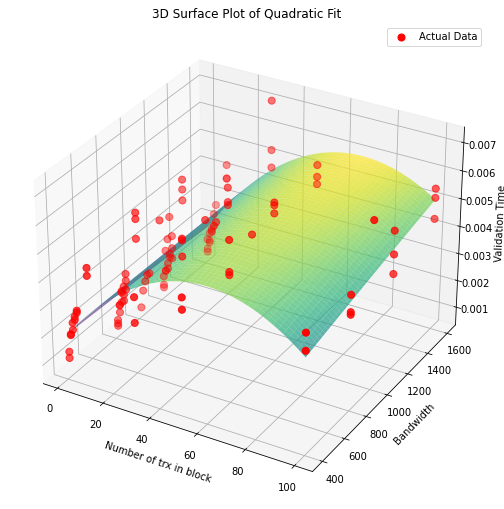

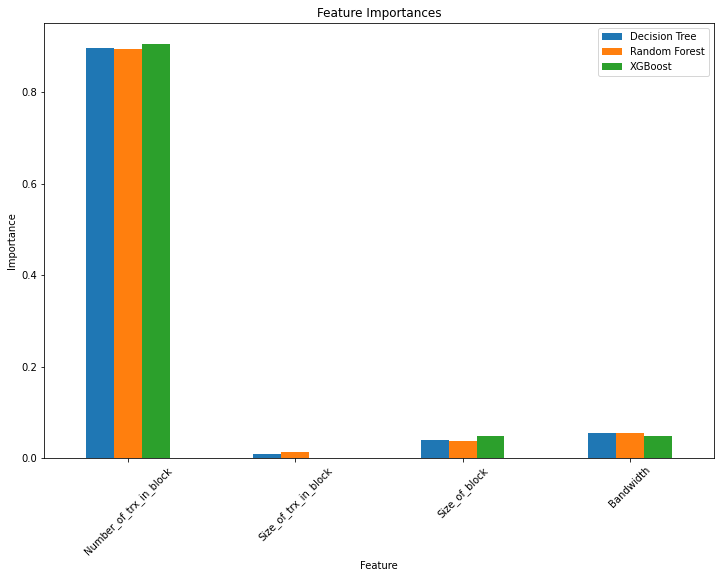

['VP1_scaler_P1.pkl']

In [35]:
## all model for org2.peer0
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from scipy.optimize import curve_fit
import xgboost as xgb  # Import XGBoost
from sklearn.preprocessing import StandardScaler


def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_elements = y_true != 0
    return np.mean(np.abs((y_true[non_zero_elements] - y_pred[non_zero_elements]) / y_true[non_zero_elements])) * 100


def plot_actual_vs_predicted(y_true, y_pred, model_name):
    """Plot Actual vs Predicted values for a given model."""
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.7, edgecolors='k')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.show()

#Data
data = {
    "Validation_time": [
        0.00137,0.00204,0.00222,0.00273,0.00297,0.00462,0.00409,0.00416,0.00404,
    0.00083,0.00164,0.00177,0.00207,0.00261,0.00497,0.00411,0.00405,0.00389,0.00079,0.00145,0.00182,0.00209,
    0.002174,0.004244,0.00473,0.004689,0.00639,0.000827,0.00224,0.0027,0.00355,0.00286,0.00506,0.0046,0.00506,
    0.00534,0.00127,0.00153,0.00159,0.00187,0.002026,0.0038,0.0053,0.0045,0.0044,0.00114,0.002006,0.00248,0.002613,
    0.0029,0.00434,0.003177,0.00459,0.004664,0.000921,0.00136,0.00212,0.00237,0.00286,0.0052,0.00469,0.005187,
    0.0045,0.00125,0.00148,0.0018,0.00204,0.00241,0.0047,0.004706,0.0047668,0.0045,0.000791,0.00125,0.00164,
    0.00185,0.00202,0.0043,0.00709,0.00477,0.00516,0.001048,0.00162,0.00218,0.001845,0.00228,0.00426,0.00475,
    0.00394,0.0038,0.000928,0.001496,0.0016,0.00216,0.00203,0.0043,0.00523,0.00516,0.0038,0.0009,0.00117,
    0.00172,0.002314,0.00268,0.00379,0.00466,0.0052,0.00549 
    ],
    "Number_of_trx_in_block": [
   1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100,
    1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100,
    1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100,
    1, 2, 3, 4, 5, 10, 30, 50, 100, 1, 2, 3, 4, 5, 10, 30, 50, 100,1, 2, 3, 4, 5, 10, 30, 50, 100,
    ],
     "Size_of_trx_in_block": [
    145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,
    145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,1450,1450,1450,1450,1450,
    1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,
    1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,
    2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450
     ],
     "Bandwidth": [
     400,400,400,400,400,400,400,400,400,800,800,800,800,800,800,800,800,800,1000,1000,1000,1000,1000,
    1000,1000,1000,1000,1200,1200,1200,1200,1200,1200,1200,1200,1200,1600,1600,1600,1600,1600,1600,1600,
    1600,1600,400,400,400,400,400,400,400,400,400,800,800,800,800,800,800,800,800,800,1200,1200,1200,1200,
    1200,1200,1200,1200,1200,1600,1600,1600,1600,1600,1600,1600,1600,1600,800,800,800,800,800,800,800,800,
    800,1200,1200,1200,1200,1200,1200,1200,1200,1200,1600,1600,1600,1600,1600,1600,1600,1600,1600    
     ]
}
df = pd.DataFrame(data)

# Create a new feature 'Size_of_block'
df['Size_of_block'] = df['Number_of_trx_in_block'] * df['Size_of_trx_in_block']

# Prepare data for regression
X = df[['Number_of_trx_in_block', 'Size_of_trx_in_block', 'Size_of_block', 'Bandwidth']]

y = df['Validation_time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)

# Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
mape_tree = mean_absolute_percentage_error(y_test, y_pred_tree)

# Random Forest Regression
forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
mape_forest = mean_absolute_percentage_error(y_test, y_pred_forest)

# XGBoost Regression
#XGBoost is an optimized gradient boosting framework designed for speed and performance
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgboost = xgboost_model.predict(X_test)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
r2_xgboost = r2_score(y_test, y_pred_xgboost)
mape_xgboost = mean_absolute_percentage_error(y_test, y_pred_xgboost)

# Define the quadratic function 2
def quadratic_model(X, a, b, c, d, e, f):
    x1, x2 = X
    return a * x1**2 + b * x1 * x2 + c * x2**2 + d * x1 + e * x2 + f
# Prepare data for quadratic model
# Standardize the data
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(df[['Number_of_trx_in_block', 'Bandwidth']]).T
X_quad = df[['Number_of_trx_in_block', 'Bandwidth']].values.T
y_quad = df['Validation_time']
# Fit the model using curve fitting
params,covariance = curve_fit(quadratic_model, X_quad, y_quad)
# Predict using the fitted model
y_pred_quad = quadratic_model(X_quad, *params)
# Extract fitted parameters
a, b, c, d, e, f = params
# Make predictions using the fitted model
predictions = quadratic_model(X_quad, *params)
# Compute performance metrics
mse_quad = mean_squared_error(y_quad, y_pred_quad)
r2_quad = r2_score(y_quad, y_pred_quad)
mape_quad = mean_absolute_percentage_error(y_quad, y_pred_quad)



# Define the quadratic function for 4 features
def quadratic_model_4_features(x1, x2, x3, x4, a, b, c, d, e, f, g, h, i, j, k, l, m, n, o):
    return (a * x1**2 + b * x2**2 + c * x3**2 + d * x4**2 +
            e * x1 * x2 + f * x1 * x3 + g * x1 * x4 +
            h * x2 * x3 + i * x2 * x4 + j * x3 * x4 +
            k * x1 + l * x2 + m * x3 + n * x4 +
            o)
# Define the model function for curve fitting
def model_func(X_flat, *params):
    x1, x2, x3, x4 = X_flat
    return quadratic_model_4_features(x1, x2, x3, x4, *params)
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Number_of_trx_in_block', 'Size_of_trx_in_block', 'Bandwidth', 'Size_of_block']])
# Prepare data for quadratic model with 4 features (transpose to get the right shape)
X_quad_4 = X_scaled.T
y_quad_4 = df['Validation_time'].values
# Fit the model using curve fitting
initial_guess = np.ones(15)
params_4, _ = curve_fit(model_func, X_quad_4, y_quad_4, p0=initial_guess)
# Predict using the fitted model
x1, x2, x3, x4 = X_quad_4  # Unpack features for prediction
y_pred_quad4 = quadratic_model_4_features(x1, x2, x3, x4, *params_4)
# Compute performance metrics
mse_quad4 = mean_squared_error(y_quad_4, y_pred_quad4)
r2_quad4 = r2_score(y_quad_4, y_pred_quad4)
mape_quad4 = mean_absolute_percentage_error(y_quad_4, y_pred_quad4)


# Display results
print("Linear Regression:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")
print(f"Mean Absolute Percentage Error: {mape_linear}%\n")

print("Decision Tree Regression:")
print(f"Mean Squared Error: {mse_tree}")
print(f"R-squared: {r2_tree}")
print(f"Mean Absolute Percentage Error: {mape_tree}%\n")

print("Random Forest Regression:")
print(f"Mean Squared Error: {mse_forest}")
print(f"R-squared: {r2_forest}")
print(f"Mean Absolute Percentage Error: {mape_forest}%\n")

print("XGBoost Regression:")
print(f"Mean Squared Error: {mse_xgboost}")
print(f"R-squared: {r2_xgboost}")
print(f"Mean Absolute Percentage Error: {mape_xgboost}%\n")

equation = f"Validation_time_P1 = ({a} * Number_of_trx_in_block^2) + ({b} * Number_of_trx_in_block * Bandwidth) + ({c} * Bandwidth^2) + ({d} * Number_of_trx_in_block) + ({e} * Bandwidth) + {f}"

print("Polynomial Regression with Degree 2:")
print(f"Mean Squared Error: {mse_quad}")
print(f"R-squared: {r2_quad}")
print(f"Mean Absolute Percentage Error: {mape_quad}%\n")
print(f"Derived Equation: {equation}")

print("Polynomial Regression with Degree 4:")
print(f"Mean Squared Error: {mse_quad4}")
print(f"R-squared: {r2_quad4}")
print(f"Mean Absolute Percentage Error: {mape_quad4}%\n")

# Update the models list and scores to include the new quadratic model with 4 features
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Polynomial Regression', 'Polynomial Regression 4']
mse_scores = [mse_linear, mse_tree, mse_forest, mse_xgboost, mse_quad, mse_quad4]
r2_scores = [r2_linear, r2_tree, r2_forest, r2_xgboost, r2_quad, r2_quad4]
mape_scores = [mape_linear, mape_tree, mape_forest, mape_xgboost, mape_quad, mape_quad4]

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Model': models,
    'MSE': mse_scores,
    'R2': r2_scores,
    'MAPE': mape_scores
})



# Melt the DataFrame for seaborn
plot_data_melted = plot_data.melt(id_vars='Model', value_vars=['MSE', 'R2', 'MAPE'], 
                                  var_name='Metric', value_name='Score')

# Plot Mean Squared Error, R-squared, and MAPE
plt.figure(figsize=(18, 6))

# Plot Mean Squared Error
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='Score', hue='Metric', data=plot_data_melted.query("Metric == 'MSE'"), palette='coolwarm', legend=False)
plt.title('Mean Squared Error Comparison')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)

# Plot R-squared
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='Score', hue='Metric', data=plot_data_melted.query("Metric == 'R2'"), palette='coolwarm', legend=False)
plt.title('R-squared Comparison')
plt.ylabel('R-squared')
plt.xticks(rotation=45)

# Plot MAPE
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='Score', hue='Metric', data=plot_data_melted.query("Metric == 'MAPE'"), palette='coolwarm', legend=False)
plt.title('MAPE Comparison')
plt.ylabel('Mean Absolute Percentage Error (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Update actual vs predicted plots
plot_actual_vs_predicted(y_test, y_pred_linear, 'Linear Regression')
plot_actual_vs_predicted(y_test, y_pred_tree, 'Decision Tree Regression')
plot_actual_vs_predicted(y_test, y_pred_forest, 'Random Forest Regression')
plot_actual_vs_predicted(y_test, y_pred_xgboost, 'XGBoost Regression')
plot_actual_vs_predicted(y_quad, y_pred_quad, 'Polynomial Regression')
plot_actual_vs_predicted(y_quad_4, y_pred_quad4, 'Polynomial Regression 4 Features')

# Feature Importances
importances_linear = np.abs(linear_model.coef_)  # Using absolute value of coefficients
importances_tree = tree_model.feature_importances_
importances_forest = forest_model.feature_importances_
importances_xgboost = xgboost_model.feature_importances_
importances_poly2 = np.abs(np.array([params[0], params[1], params[2], params[3], params[4], params[5]]))  # Absolute values of the coefficients


# Create a DataFrame to hold the feature importances
# Mean Squared Error (MSE) is a metric that measures the average of the squares of the differences between the actual and predicted values.
# R-squared (R²) is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
#Mean Absolute Percentage Error (MAPE) is a metric that measures the average percentage error between the predicted and actual values, providing insight into the accuracy of the model.



# 3D Plot for quadratic model with 2 features
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(121, projection='3d')

# Define the range for x1 and x2
x1 = np.linspace(df['Number_of_trx_in_block'].min(), df['Number_of_trx_in_block'].max(), 100)
x2 = np.linspace(df['Bandwidth'].min(), df['Bandwidth'].max(), 100)
X1, X2 = np.meshgrid(x1, x2)
Z = quadratic_model(np.array([X1.ravel(), X2.ravel()]), *params).reshape(X1.shape)

# Plot the surface
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.7, edgecolor='none')
ax.scatter(df['Number_of_trx_in_block'], df['Bandwidth'], df['Validation_time'], c='red', s=50, label='Actual Data')
ax.set_xlabel('Number of trx in block')
ax.set_ylabel('Bandwidth')
ax.set_zlabel('Validation Time')
ax.set_title('3D Surface Plot of Quadratic Fit')
ax.legend()

plt.tight_layout()
plt.show()


# Create a DataFrame for feature importances
importances_data = pd.DataFrame({
    'Feature': X.columns,
    'Decision Tree': importances_tree,
    'Random Forest': importances_forest,
    'XGBoost': importances_xgboost
})
# Plot Feature Importances
importances_data.plot(x='Feature', kind='bar', figsize=(12, 8))
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

#Best Performance: Random Forest Regression and XGBoost Regression 

import joblib

# Save the models
joblib.dump(linear_model, 'VP1_linear_model.pkl')
joblib.dump(tree_model, 'VP1_tree_model.pkl')
joblib.dump(forest_model, 'VP1_forest_model.pkl')
joblib.dump(xgboost_model, 'VP1_xgboost_model.pkl')
joblib.dump(params_4, 'VP1_quadratic_model_4_features_params.pkl')
joblib.dump(params, 'VP1_quadratic_model.pkl')
joblib.dump(scaler, 'VP1_scaler_P1.pkl')


In [1]:
python -m ipykernel install --user --name=myenv --display-name "Python (myenv)"



SyntaxError: invalid syntax (1262220118.py, line 1)